##**NAME -** RUPAYAN GHOSH
##**ROLL NO.** - 001811001015
##**MACHINE LEARNING LAB ASSIGNMENT 2**

#Import required modules

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

#Load Dataset

In [ ]:
iris = datasets.load_iris() # it's source is same as : https://archive.ics.uci.edu/ml/datasets/Iris/

In [ ]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#DataFrame ready to perform

In [ ]:
df["flower_names"] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
len(df)

150

In [ ]:
X = df.drop(["target", "flower_names"], axis="columns")
y = df.target
print(X.head())
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


#SVC Classfier

##Linear SVC Classifier



In [ ]:
linear_SVC_classifier = SVC(kernel='linear')
linear_SVC_classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###train size : test size = 70% : 30%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)    # 70% training data, 30% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

105
45


In [ ]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 97.77777777777777%

Confusion Matrix:

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



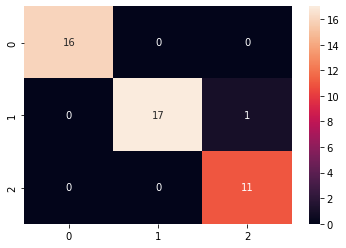

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 60% : 40%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)    # 60% training data, 40% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

90
60


In [ ]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 96.66666666666667%

Confusion Matrix:
[[16  0  0]
 [ 0 22  1]
 [ 0  1 20]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.96      0.96      0.96        23
           2       0.95      0.95      0.95        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



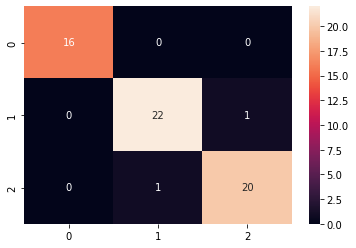

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)    # 50% training data, 50% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

75
75


In [ ]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 97.33333333333334%

Confusion Matrix:
[[21  0  0]
 [ 0 29  1]
 [ 0  1 23]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.97      0.97      0.97        30
           2       0.96      0.96      0.96        24

    accuracy                           0.97        75
   macro avg       0.98      0.98      0.98        75
weighted avg       0.97      0.97      0.97        75



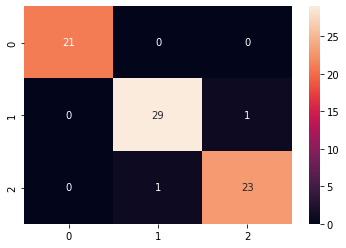

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

60
90


In [ ]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 96.66666666666667%

Confusion Matrix:

[[26  0  0]
 [ 0 32  1]
 [ 0  2 29]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.94      0.97      0.96        33
           2       0.97      0.94      0.95        31

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



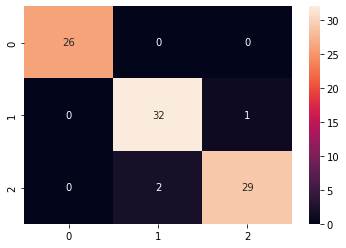

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

45
105


In [ ]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 95.23809523809523%

Confusion Matrix:

[[33  0  0]
 [ 0 33  1]
 [ 0  4 34]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.89      0.97      0.93        34
           2       0.97      0.89      0.93        38

    accuracy                           0.95       105
   macro avg       0.95      0.96      0.95       105
weighted avg       0.95      0.95      0.95       105



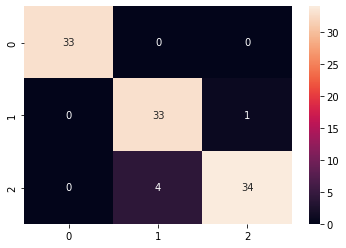

In [ ]:
sns.heatmap(cf_matrix, annot=True)

##Polynomial SVC Classifier

In [ ]:
poly_SVC_classifier = SVC(kernel='poly')
poly_SVC_classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###train size : test size = 70% : 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

105
45


In [ ]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 97.77777777777777%

Confusion Matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



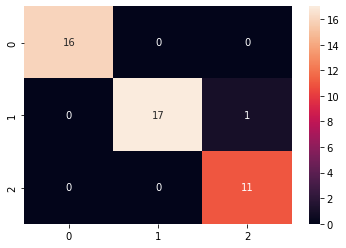

In [ ]:
sns.heatmap(cf_matrix, annot=True)

### train size : test size = 60% : 40%



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

90
60


In [ ]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 90.0%

Confusion Matrix:
 [[16  0  0]
 [ 0 22  1]
 [ 0  5 16]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.81      0.96      0.88        23
           2       0.94      0.76      0.84        21

    accuracy                           0.90        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.91      0.90      0.90        60



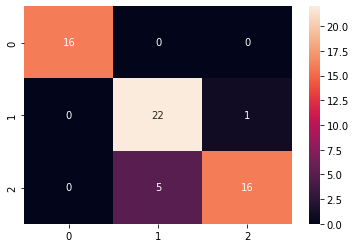

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

75
75


In [ ]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 92.0%

Confusion Matrix:
 [[21  0  0]
 [ 0 29  1]
 [ 0  5 19]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.85      0.97      0.91        30
           2       0.95      0.79      0.86        24

    accuracy                           0.92        75
   macro avg       0.93      0.92      0.92        75
weighted avg       0.93      0.92      0.92        75



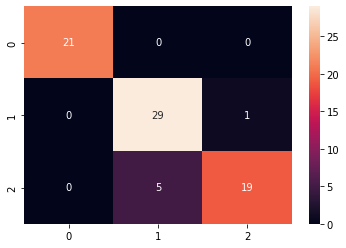

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

60
90


In [ ]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 93.33333333333333%

Confusion Matrix:
 [[26  0  0]
 [ 0 32  1]
 [ 0  5 26]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.86      0.97      0.91        33
           2       0.96      0.84      0.90        31

    accuracy                           0.93        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.93      0.93        90



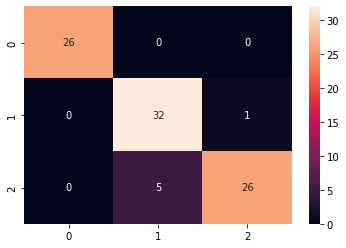

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

45
105


In [ ]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 94.28571428571428%

Confusion Matrix:
 [[33  0  0]
 [ 0 34  0]
 [ 0  6 32]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.85      1.00      0.92        34
           2       1.00      0.84      0.91        38

    accuracy                           0.94       105
   macro avg       0.95      0.95      0.94       105
weighted avg       0.95      0.94      0.94       105



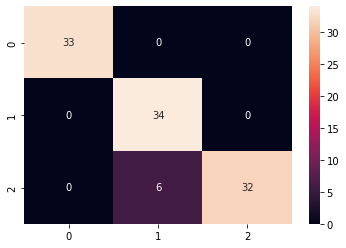

In [ ]:
sns.heatmap(cf_matrix, annot=True)

##Gaussain SVC Classifier

In [ ]:
gaussain_SVC_classifier = SVC(kernel='rbf')
gaussain_SVC_classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###train size : test size = 70% : 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

105
45


In [ ]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 97.77777777777777%

Confusion Matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



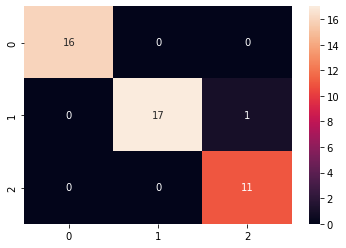

In [ ]:
sns.heatmap(cf_matrix, annot=True)

### train size : test size = 60% : 40%



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

90
60


In [ ]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 93.33333333333333%

Confusion Matrix:
 [[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.96      0.92        23
           2       0.95      0.86      0.90        21

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



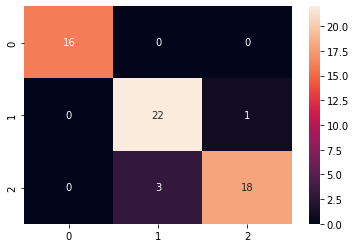

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

75
75


In [ ]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 94.66666666666667%

Confusion Matrix:
 [[21  0  0]
 [ 0 29  1]
 [ 0  3 21]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.91      0.97      0.94        30
           2       0.95      0.88      0.91        24

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



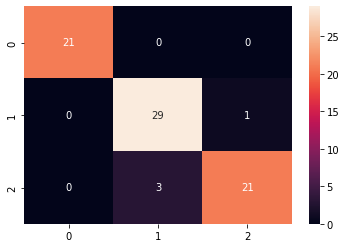

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

60
90


In [ ]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 93.33333333333333%

Confusion Matrix:
 [[26  0  0]
 [ 0 32  1]
 [ 0  5 26]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.86      0.97      0.91        33
           2       0.96      0.84      0.90        31

    accuracy                           0.93        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.93      0.93        90



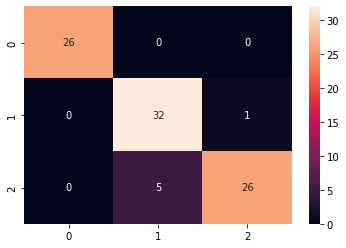

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

45
105


In [ ]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 88.57142857142857%

Confusion Matrix:
 [[33  0  0]
 [ 0 34  0]
 [ 0 12 26]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.74      1.00      0.85        34
           2       1.00      0.68      0.81        38

    accuracy                           0.89       105
   macro avg       0.91      0.89      0.89       105
weighted avg       0.92      0.89      0.88       105



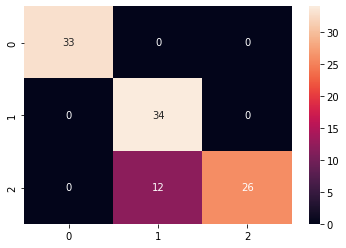

In [ ]:
sns.heatmap(cf_matrix, annot=True)

##Sigmoid SVC Classifier

In [ ]:
sigmoid_SVC_classifier = SVC(kernel='sigmoid')
sigmoid_SVC_classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###train size : test size = 70% : 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

105
45


In [ ]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 24.444444444444443%

Confusion Matrix:
 [[ 0  0 16]
 [ 0  0 18]
 [ 0  0 11]]

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        18
           2       0.24      1.00      0.39        11

    accuracy                           0.24        45
   macro avg       0.08      0.33      0.13        45
weighted avg       0.06      0.24      0.10        45



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


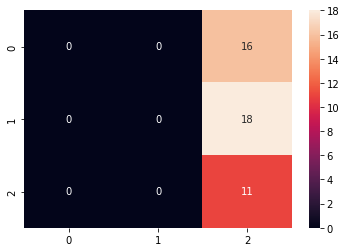

In [ ]:
sns.heatmap(cf_matrix, annot=True)

### train size : test size = 60% : 40%



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

90
60


In [ ]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 26.666666666666668%

Confusion Matrix:
 [[16  0  0]
 [23  0  0]
 [21  0  0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.27      1.00      0.42        16
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        21

    accuracy                           0.27        60
   macro avg       0.09      0.33      0.14        60
weighted avg       0.07      0.27      0.11        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


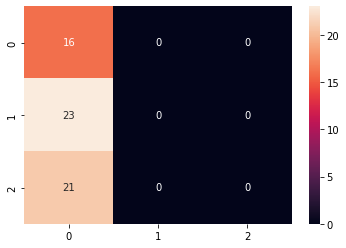

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

75
75


In [ ]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 28.000000000000004%

Confusion Matrix:
 [[21  0  0]
 [30  0  0]
 [24  0  0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.28      1.00      0.44        21
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        24

    accuracy                           0.28        75
   macro avg       0.09      0.33      0.15        75
weighted avg       0.08      0.28      0.12        75



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


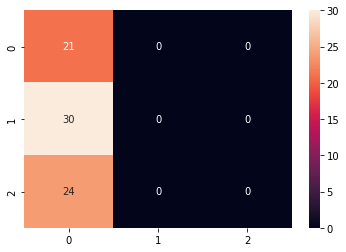

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

60
90


In [ ]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 28.888888888888886%

Confusion Matrix:
 [[26  0  0]
 [33  0  0]
 [31  0  0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.29      1.00      0.45        26
           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        31

    accuracy                           0.29        90
   macro avg       0.10      0.33      0.15        90
weighted avg       0.08      0.29      0.13        90



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


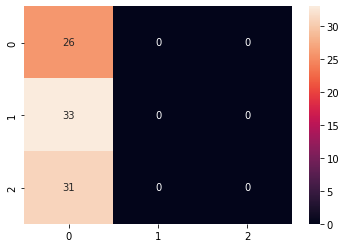

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

45
105


In [ ]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 31.428571428571427%

Confusion Matrix:
 [[33  0  0]
 [34  0  0]
 [38  0  0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.31      1.00      0.48        33
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        38

    accuracy                           0.31       105
   macro avg       0.10      0.33      0.16       105
weighted avg       0.10      0.31      0.15       105



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


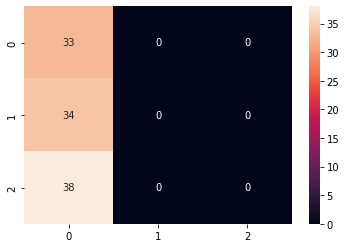

In [ ]:
sns.heatmap(cf_matrix, annot=True)

#MLP Classifier

In [ ]:
mlp_classifier = MLPClassifier(learning_rate='constant', max_iter=600)
mlp_classifier

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

###train size : test size = 70% : 30%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)    # 70% training data, 30% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

105
45


In [ ]:
mlp_classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 97.77777777777777%

Confusion Matrix:

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



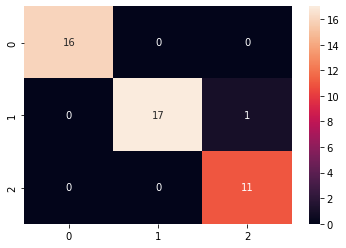

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 60% : 40%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)    # 60% training data, 40% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

90
60


In [ ]:
mlp_classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 96.66666666666667%

Confusion Matrix:
[[16  0  0]
 [ 0 22  1]
 [ 0  1 20]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.96      0.96      0.96        23
           2       0.95      0.95      0.95        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



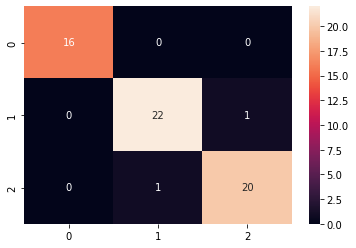

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)    # 50% training data, 50% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

75
75


In [ ]:
mlp_classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 97.33333333333334%

Confusion Matrix:
[[21  0  0]
 [ 0 29  1]
 [ 0  1 23]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.97      0.97      0.97        30
           2       0.96      0.96      0.96        24

    accuracy                           0.97        75
   macro avg       0.98      0.98      0.98        75
weighted avg       0.97      0.97      0.97        75



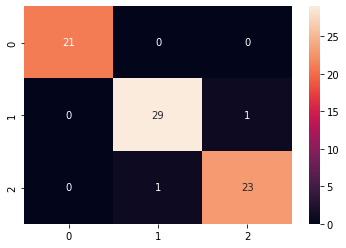

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

60
90


In [ ]:
mlp_classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 97.77777777777777%

Confusion Matrix:

[[26  0  0]
 [ 0 32  1]
 [ 0  1 30]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.97      0.97      0.97        33
           2       0.97      0.97      0.97        31

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



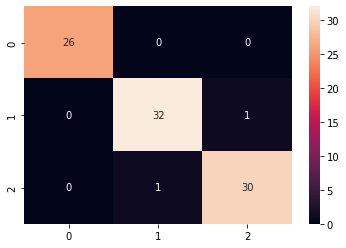

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

45
105


In [ ]:
mlp_classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 97.14285714285714%

Confusion Matrix:

[[33  0  0]
 [ 0 33  1]
 [ 0  2 36]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.94      0.97      0.96        34
           2       0.97      0.95      0.96        38

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



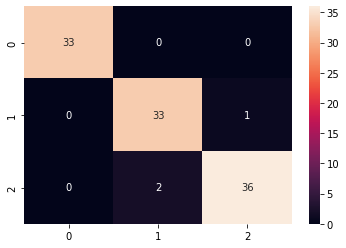

In [ ]:
sns.heatmap(cf_matrix, annot=True)

#Random Forest Classifier

In [ ]:
rfc_classifier = RandomForestClassifier(n_estimators=20)
rfc_classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

###train size : test size = 70% : 30%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)    # 70% training data, 30% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

105
45


In [ ]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 97.77777777777777%

Confusion Matrix:

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



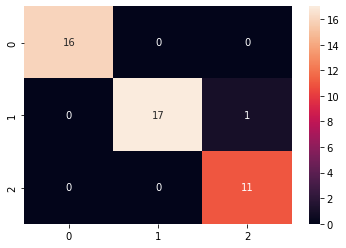

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 60% : 40%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)    # 60% training data, 40% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

90
60


In [ ]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 93.33333333333333%

Confusion Matrix:
[[16  0  0]
 [ 0 23  0]
 [ 0  4 17]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      1.00      0.92        23
           2       1.00      0.81      0.89        21

    accuracy                           0.93        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



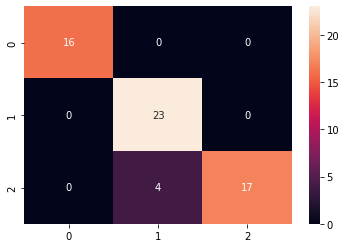

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)    # 50% training data, 50% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

75
75


In [ ]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 93.33333333333333%

Confusion Matrix:
[[21  0  0]
 [ 0 29  1]
 [ 0  4 20]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      0.97      0.92        30
           2       0.95      0.83      0.89        24

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.94      0.93      0.93        75



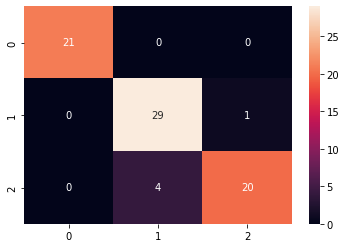

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

60
90


In [ ]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 96.66666666666667%

Confusion Matrix:

[[26  0  0]
 [ 0 33  0]
 [ 0  3 28]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.92      1.00      0.96        33
           2       1.00      0.90      0.95        31

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



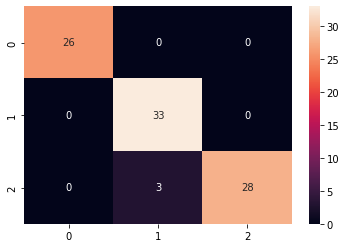

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

45
105


In [ ]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 95.23809523809523%

Confusion Matrix:

[[33  0  0]
 [ 0 33  1]
 [ 0  4 34]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.89      0.97      0.93        34
           2       0.97      0.89      0.93        38

    accuracy                           0.95       105
   macro avg       0.95      0.96      0.95       105
weighted avg       0.95      0.95      0.95       105



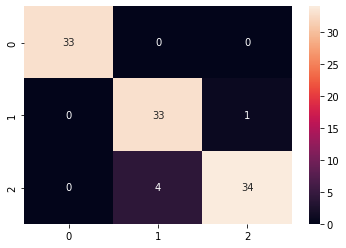

In [ ]:
sns.heatmap(cf_matrix, annot=True)